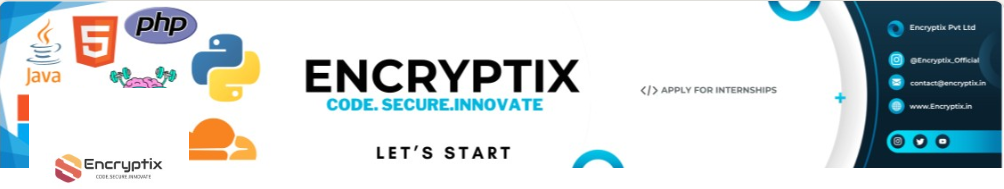

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import plotly.express as px
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card Fraud Detection Dataset/fraudTest.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card Fraud Detection Dataset/fraudTrain.csv')

In [ ]:
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 150) # display all rows
sns.set_style('whitegrid') # set the grid style
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000' # remove the background color
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

In [ ]:
from sklearn.model_selection import train_test_split
train_sample = train.sample(frac=0.1, random_state=42) # 10% sample of the data
train_sample, train_val = train_test_split(train_sample, test_size=0.25, random_state=42) # 75% train, 25% validation

In [ ]:
train_sample.shape, train_val.shape

((41679, 23), (13893, 23))

In [ ]:
train_sample.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
410040,410040,2020-11-30 01:51:58,30407675418785,fraud_Kuhn LLC,misc_net,3.39,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,14816,42.1939,-76.7361,520,Psychotherapist,1991-10-13,a79b65b95d22688490ebbae841530463,1385776318,42.368898,-77.597350,0
515538,515538,2020-12-22 16:37:17,4783226709001,fraud_Botsford PLC,home,13.99,Jessica,Garcia,F,13108 Jennifer Passage,Mc Cracken,KS,67556,38.5957,-99.5540,320,Film/video editor,1961-04-22,ece2a4cc1dd98e36a67d6247b66f89c5,1387730237,38.006762,-100.188522,0
154699,154699,2020-08-14 15:24:30,3583793405872580,fraud_Stiedemann Ltd,food_dining,8.59,Beth,Lambert,F,6447 Johnson Estates Apt. 986,Roosevelt,OK,73564,34.8470,-98.9836,551,Amenity horticulturist,1970-09-27,b7970900c86ec75c229ad67bed52e4dd,1376493870,35.191468,-99.643726,0
541672,541672,2020-12-28 19:19:20,3518758680062249,fraud_Hackett Group,travel,2.52,Antonio,Koch,M,8738 Richard Brooks,Moab,UT,84532,38.5677,-109.5271,9772,Location manager,1989-11-24,f151860e28784114162c9bc6f333e3d3,1388258360,38.818351,-109.860522,0
266153,266153,2020-09-27 21:58:17,3575789281659026,"fraud_Bradtke, Torp and Bahringer",personal_care,92.53,Lindsay,Wilson,F,7618 Gonzales Mission,Centerview,MO,64019,38.7897,-93.8702,2368,Electronics engineer,1989-07-17,20cb1c3224eb1c66e7e4157e8c3b888d,1380319097,39.726098,-94.463114,0


In [ ]:
train_sample.nunique()

,0
Unnamed: 0,41679
trans_date_trans_time,41609
cc_num,918
merchant,693
category,14
amt,14963
first,339
last,469
gender,2
street,918


In [ ]:
train_sample.drop(columns=['Unnamed: 0', 'trans_num', 'unix_time', 'merch_lat','merch_long','trans_date_trans_time'], inplace=True)

In [ ]:
test.drop(columns=['Unnamed: 0', 'trans_num', 'unix_time', 'merch_lat','merch_long','trans_date_trans_time'], inplace=True)

In [ ]:
train_val.drop(columns=['Unnamed: 0', 'trans_num', 'unix_time', 'merch_lat','merch_long','trans_date_trans_time'], inplace=True)

In [ ]:
train_sample.drop(columns=['first','last'],inplace=True)

In [ ]:
test.drop(columns=['first','last'],inplace=True)

In [ ]:
train_val.drop(columns=['first','last'],inplace=True)

In [ ]:
from datetime import datetime

# Ensure 'dob' is in datetime format
train_sample['dob'] = pd.to_datetime(train_sample['dob'])

# Calculate age
train_sample['age'] = datetime.now().year - train_sample['dob'].dt.year


In [ ]:
# Convert 'dob' to datetime format
test['dob'] = pd.to_datetime(test['dob'], errors='coerce')

# Check for conversion issues
print(test['dob'].dtype)
print(test['dob'].head())
print(test['dob'].isna().sum())  # Check if there are any missing values after conversion

# Drop rows with invalid 'dob' values if necessary
test = test.dropna(subset=['dob'])

# Calculate age
test['age'] = datetime.now().year - test['dob'].dt.year


datetime64[ns]
0   1988-03-09
1   1978-06-21
2   1962-01-19
3   1967-01-12
4   1986-03-28
Name: dob, dtype: datetime64[ns]
0


In [ ]:
print(train_val[['dob', 'age']].head())


              dob  age
384504 1962-04-12   62
41156  1965-03-25   59
197006 1977-08-12   47
301115 1969-11-01   55
476696 1999-06-28   25


In [ ]:
train_sample.drop(columns=['dob'], inplace=True)

In [ ]:
test.drop(columns=['dob'], inplace=True)

In [ ]:
train_val.drop(columns=['dob'], inplace=True)

In [ ]:
train_sample.nunique()

,0
cc_num,918
merchant,693
category,14
amt,14963
gender,2
street,918
city,844
state,50
zip,906
lat,904


In [ ]:
px.histogram(train_sample, x='city_pop', color='is_fraud', barmode='group') # try changing x to see the distribution

In [ ]:
test_sample = test.sample(frac=0.05, random_state=42) # 5% sample of the data

In [ ]:
train_sample.shape, test_sample.shape, train_val.shape

((41679, 15), (64834, 15), (13893, 15))

<Axes: >

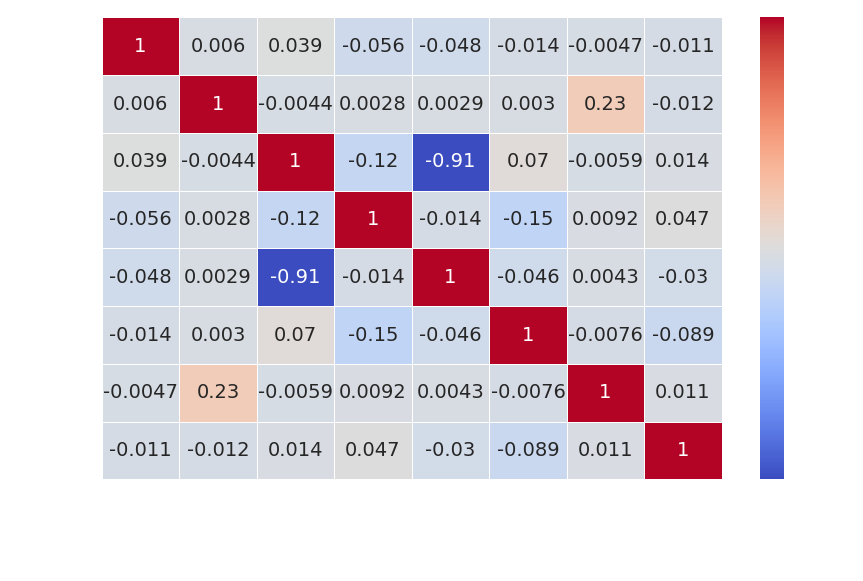

In [ ]:
numerical_cols = train_sample.select_dtypes(include=(np.number)).columns
categorical_cols = train_sample.select_dtypes(include=('object')).columns
correlation_matrix = train_sample[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [ ]:
train_sample[numerical_cols].head()

,cc_num,amt,zip,lat,long,city_pop,is_fraud,age
410040,30407675418785,3.39,14816,42.1939,-76.7361,520,0,33
515538,4783226709001,13.99,67556,38.5957,-99.5540,320,0,63
154699,3583793405872580,8.59,73564,34.8470,-98.9836,551,0,54
541672,3518758680062249,2.52,84532,38.5677,-109.5271,9772,0,35
266153,3575789281659026,92.53,64019,38.7897,-93.8702,2368,0,35


In [ ]:
train_sample[categorical_cols].head()

,merchant,category,gender,street,city,state,job
410040,fraud_Kuhn LLC,misc_net,F,76752 David Lodge Apt. 064,Breesport,NY,Psychotherapist
515538,fraud_Botsford PLC,home,F,13108 Jennifer Passage,Mc Cracken,KS,Film/video editor
154699,fraud_Stiedemann Ltd,food_dining,F,6447 Johnson Estates Apt. 986,Roosevelt,OK,Amenity horticulturist
541672,fraud_Hackett Group,travel,M,8738 Richard Brooks,Moab,UT,Location manager
266153,"fraud_Bradtke, Torp and Bahringer",personal_care,F,7618 Gonzales Mission,Centerview,MO,Electronics engineer


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(train_sample[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_sample[encoded_cols] = encoder.transform(train_sample[categorical_cols]).toarray()

Streaming output truncated to the last 5000 lines.
<ipython-input-36-3dddbf9caaaf>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-36-3dddbf9caaaf>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-36-3dddbf9caaaf>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipytho

In [ ]:
train_sample.shape

(41679, 3014)

In [ ]:
target_col = 'is_fraud'
numerical_cols = numerical_cols.drop('cc_num')

In [ ]:
from sklearn.preprocessing import StandardScaler
train_sample[numerical_cols] = StandardScaler().fit_transform(train_sample[numerical_cols])
train_val[numerical_cols] = StandardScaler().fit_transform(train_val[numerical_cols])
test[numerical_cols] = StandardScaler().fit_transform(test[numerical_cols])

In [ ]:
train_sample[numerical_cols]

,amt,zip,lat,long,city_pop,is_fraud,age
410040,-0.449757,-1.268234,0.716980,0.981699,-0.290263,-0.063044,-1.019879
515538,-0.378166,0.695277,0.007240,-0.678769,-0.290939,-0.063044,0.701804
154699,-0.414637,0.918955,-0.732186,-0.637261,-0.290158,-0.063044,0.185299
541672,-0.455633,1.327294,0.001717,-1.404516,-0.258977,-0.063044,-0.905100
266153,0.152280,0.563594,0.045506,-0.265157,-0.284014,-0.063044,-0.905100
...,...,...,...,...,...,...,...
306994,0.014772,-1.531301,0.349920,1.182196,-0.280933,-0.063044,-0.273817
199319,-0.456376,-1.660228,1.084573,1.474391,-0.281119,-0.063044,-1.364216
509076,0.118240,0.183178,0.860340,-0.061276,-0.289052,-0.063044,-0.044259
296904,-0.389985,1.023273,-0.963342,-0.613538,-0.284186,-0.063044,0.529635


In [ ]:
train_sample[encoded_cols].shape

(41679, 2999)

In [ ]:
train_sample[numerical_cols].shape

(41679, 7)

In [ ]:
x_train = train_sample[encoded_cols + list(numerical_cols)]

In [ ]:
x_train.shape

(41679, 3006)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(x_train)
n_components = pca.n_components_
n_components

974

Number of components to retain 95.0% variance: 974


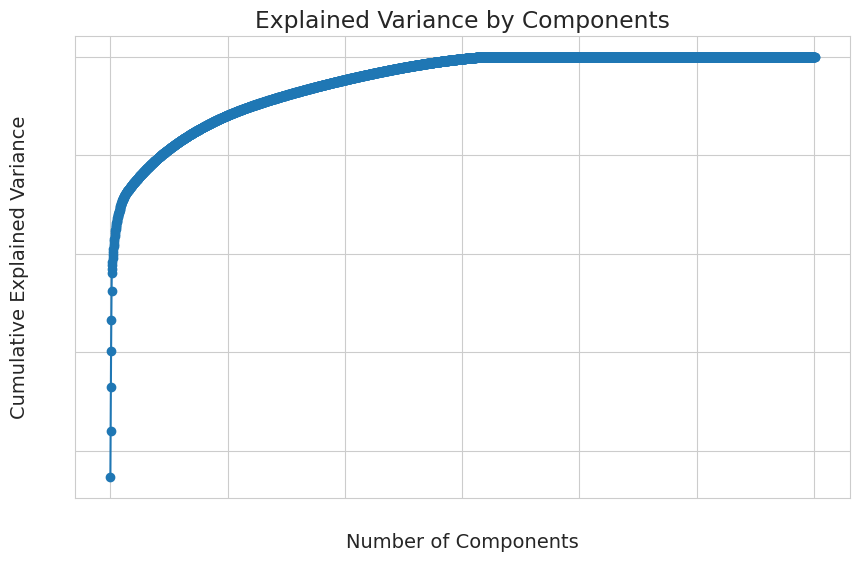

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(x_train)  # Fit PCA without specifying n_components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)

# Find the number of components for a desired explained variance, e.g., 0.95
desired_variance = 0.95
components_for_desired_variance = np.where(cumulative_variance_ratio >= desired_variance)[0][0] + 1
print(f"Number of components to retain {desired_variance*100}% variance: {components_for_desired_variance}")

In [ ]:
from sklearn.decomposition import IncrementalPCA
reduced_cols = IncrementalPCA(n_components = n_components, batch_size = n_components).fit_transform(x_train)

In [ ]:
reduced_cols.shape

(78643, 1015)

In [ ]:
from sklearn.ensemble import IsolationForest
predictor = IsolationForest(n_estimators=200, random_state=42, contamination=0.01).fit_predict(reduced_cols)
predictor = np.where(predictor == -1, 2, predictor)  # Temporarily replace -1 with 2 to avoid conflict
predictor = np.where(predictor == 1, 0, predictor)  # Replace 1 with 0
predictor = np.where(predictor == 2, 1, predictor)  # Finally, replace 2 (originally -1) with 1

In [ ]:
np.unique(predictor,return_counts=True)

(array([0, 1]), array([77856,   787], dtype=int64))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_sample[target_col], predictor))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     78197
           1       0.01      0.02      0.02       446

    accuracy                           0.98     78643
   macro avg       0.50      0.51      0.51     78643
weighted avg       0.99      0.98      0.99     78643



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_sample[target_col], predictor)

array([[77421,   776],
       [  435,    11]], dtype=int64)

In [ ]:
from sklearn.metrics import roc_auc_score
auc_roc_score = roc_auc_score(train_sample[target_col], predictor)
print("AUC-ROC Score:", auc_roc_score)

AUC-ROC Score: 0.5073700113849515
